In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import unitary_group
import jax
import jax.numpy as jnp

from permanent import perm
from piquasso._math.permanent import permanent

def generate_random_unitary(n):
    return unitary_group.rvs(n, random_state=42)

def generate_multiplicity_vectors(n):
    rows = np.ones(n, dtype=np.uint64) * 3
    cols = np.ones(n, dtype=np.uint64) * 3
    return rows, cols

/tmp/ipykernel_3470740/2765902663.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


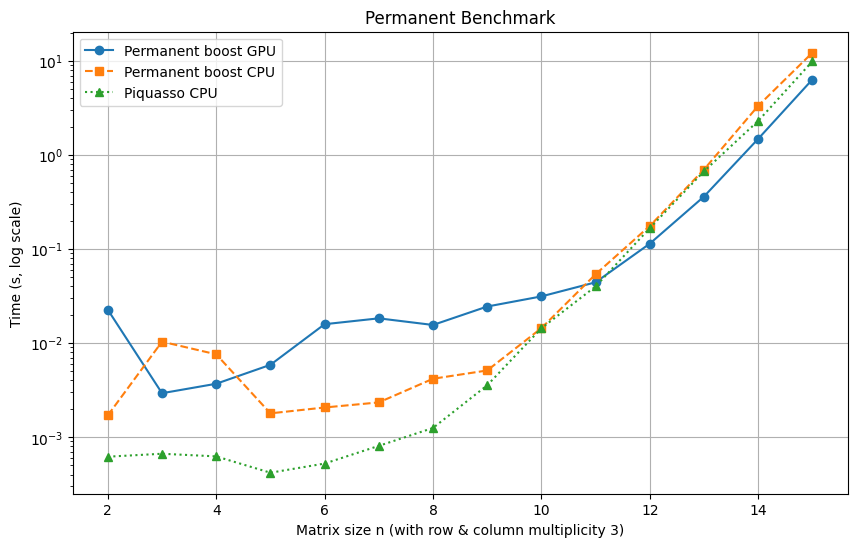

In [ ]:
n_values = range(2, 16)
times_gpu = []
times_cpu = []
times_piquasso = []

for n in n_values:
    matrix = generate_random_unitary(n)
    rows, cols = generate_multiplicity_vectors(n)
    
    # permanent boost GPU
    try:
        jax.config.update('jax_platform_name', 'gpu')
        with jax.default_device(jax.devices('gpu')[0]):
            start = time.time()
            perm(matrix, rows, cols)
            times_gpu.append(time.time() - start)
    except Exception as e:
        times_gpu.append(np.nan)
    
    # permanent boost CPU
    try:
        jax.config.update('jax_platform_name', 'cpu')
        with jax.default_device(jax.devices('cpu')[0]):
            start = time.time()
            perm(matrix, rows, cols)
            times_cpu.append(time.time() - start)
    except Exception as e:
        times_cpu.append(np.nan)
    
    # piquasso
    try:
        start = time.time()
        permanent(matrix, rows, cols)
        times_piquasso.append(time.time() - start)
    except Exception as e:
        times_piquasso.append(np.nan)

plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.xlabel('Matrix size n (with row & column multiplicity 3)')
plt.ylabel('Time (s, log scale)')
plt.title('Permanent Benchmark')
plt.legend()
plt.grid(True)
plt.plot(n_values, times_gpu, label='Permanent boost GPU', linestyle='-', marker='o')
plt.plot(n_values, times_cpu, label='Permanent boost CPU', linestyle='--', marker='s')
plt.plot(n_values, times_piquasso, label='Piquasso CPU', linestyle=':', marker='^')
plt.legend()
plt.show()

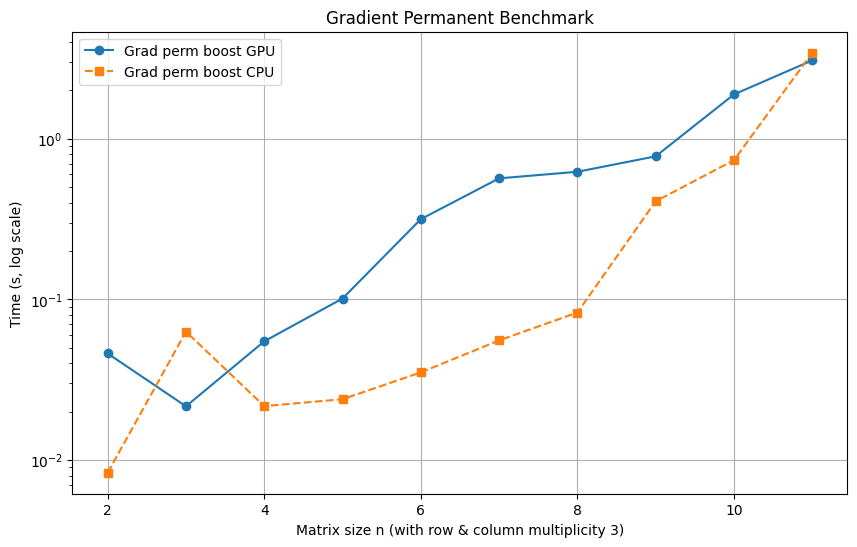

In [ ]:
n_values = range(2, 13)
times_grad_gpu = []
times_grad_cpu = []
times_grad_piquasso = []

for n in n_values:
    matrix = generate_random_unitary(n)
    rows, cols = generate_multiplicity_vectors(n)

    # grad perm boost GPU
    try:
        jax.config.update('jax_platform_name', 'gpu')
        with jax.default_device(jax.devices('gpu')[0]):
            start = time.time()
            jax.grad(perm, holomorphic=True)(matrix, rows, cols)
            times_grad_gpu.append(time.time() - start)
    except Exception as e:
        times_grad_gpu.append(np.nan)

    # grad perm boost CPU
    try:
        jax.config.update('jax_platform_name', 'cpu')
        with jax.default_device(jax.devices('cpu')[0]):
            start = time.time()
            jax.grad(perm, holomorphic=True)(matrix, rows, cols)
            times_grad_cpu.append(time.time() - start)
    except Exception as e:
        times_grad_cpu.append(np.nan)

plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.xlabel('Matrix size n (with row & column multiplicity 3)')
plt.ylabel('Time (s, log scale)')
plt.title('Gradient Permanent Benchmark')
plt.plot(n_values, times_grad_gpu, label='Grad perm boost GPU', linestyle='-', marker='o')
plt.plot(n_values, times_grad_cpu, label='Grad perm boost CPU', linestyle='--', marker='s')
plt.legend()
plt.grid(True)
plt.show()